<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/imbalanced-dataset/01-data-sampling/04_oversampling_and_undersampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Oversampling and Undersampling

In [4]:
from collections import Counter
from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

from numpy import mean
from numpy import where
from matplotlib import pyplot

In [2]:
def get_x_y():
  X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
  return X, y

Counter({0: 9900, 1: 100})


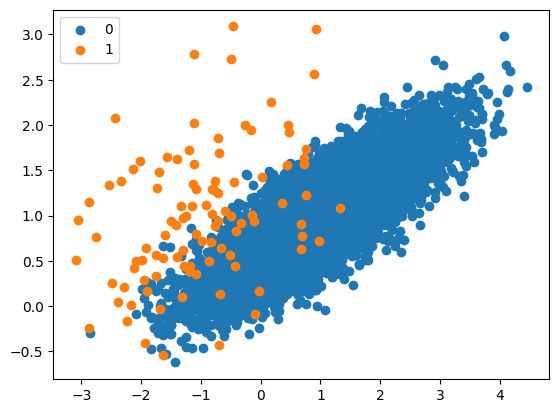

In [3]:
# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Binary Test Problem

In [5]:
# let's train a model that is sensitive to the class distribution in the training dataset

# evaluates a decision tree model on the imbalanced dataset
model = DecisionTreeClassifier()

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)
# summarize performance
print(f"Mean ROC AUC: {mean(scores)}")

Mean ROC AUC: 0.7708080808080808


##Manually Combine Data Sampling

Counter({0: 188, 1: 100})


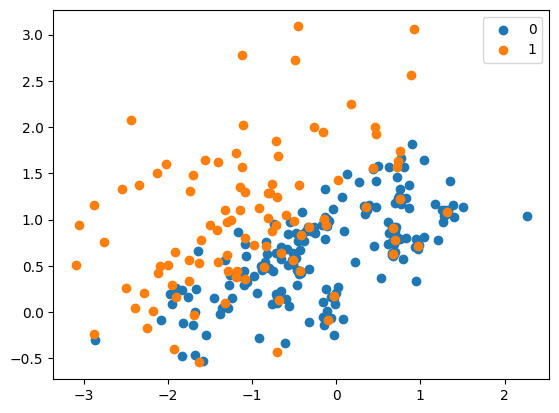

In [ ]:
# undersample and plot imbalanced dataset with the Condensed Nearest Neighbor Rule

# define dataset
X, y = get_x_y()

# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Select Examples to Delete

###Tomek Links

Counter({0: 9900, 1: 100})
Counter({0: 9874, 1: 100})


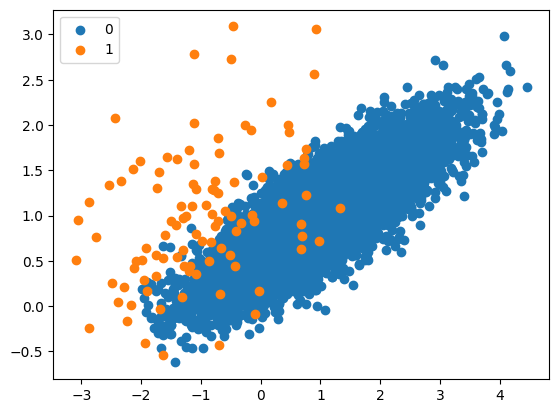

In [ ]:
# undersample and plot imbalanced dataset with Tomek Links

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = TomekLinks()
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###Edited Nearest Neighbors Rule

Counter({0: 9900, 1: 100})
Counter({0: 9806, 1: 100})


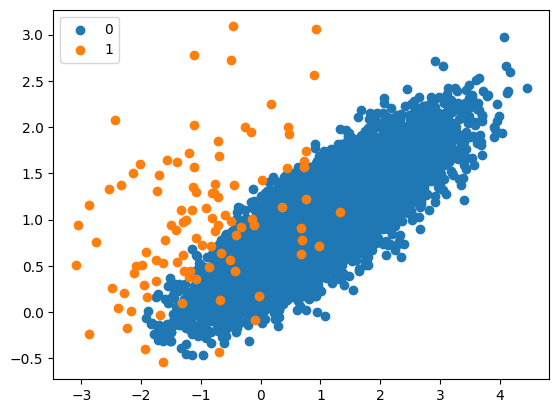

In [ ]:
# undersample and plot imbalanced dataset with the Edited Nearest Neighbor rule

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = EditedNearestNeighbours(n_neighbors=3)
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Combinations of Keep and Delete Methods

###One-Sided Selection

Counter({0: 9900, 1: 100})
Counter({0: 956, 1: 100})


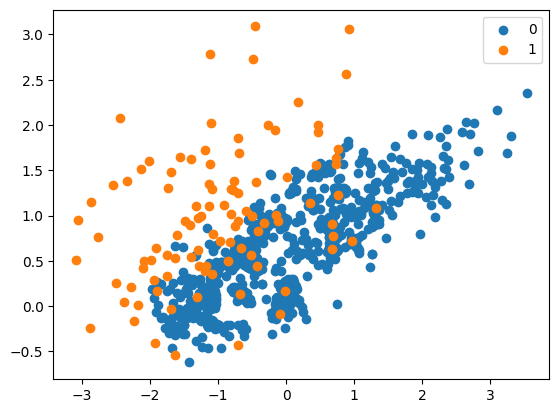

In [ ]:
# undersample and plot imbalanced dataset with One-Sided Selection

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###Neighborhood Cleaning Rule

Counter({0: 9900, 1: 100})
Counter({0: 9786, 1: 100})


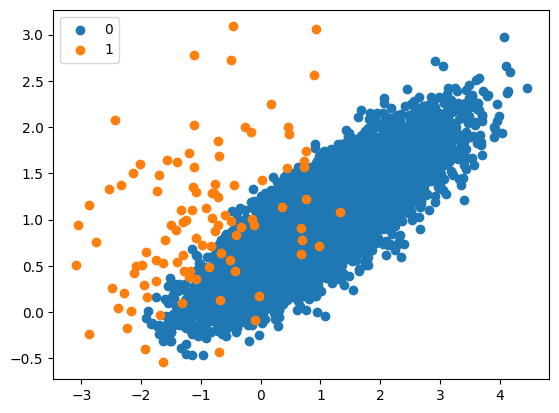

In [ ]:
# undersample and plot imbalanced dataset with the neighborhood cleaning rule

# define dataset
X, y = get_x_y()
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
X, y = oversample.fit_resample(X, y)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()